In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
file_path = "data/droid_small/data/chunk-000/file-000.parquet"
df_data = pd.read_parquet(file_path)

print("Length: ", len(df_data))

print("First Row: ")
first_row_dict = df_data.iloc[0].to_dict()
print(first_row_dict)

print("Max Task Idx: ", df_data["task_index"].max())
print("Max Episode Idx: ", df_data["episode_index"].max())
print("Max Idx: ", df_data["index"].max())

Length:  13703
First Row: 
{'is_first': True, 'is_last': False, 'is_terminal': False, 'language_instruction': '', 'language_instruction_2': '', 'language_instruction_3': '', 'observation.state.gripper_position': 0.0, 'observation.state.cartesian_position': array([ 0.41833705, -0.16570441,  0.51653355,  3.01289392, -0.27949667,
       -0.26123703]), 'observation.state.joint_position': array([-0.22476004, -0.42106023, -0.12811285, -2.35475683, -0.19623408,
        2.21800232,  0.02638818]), 'observation.state': array([-0.22476004, -0.42106023, -0.12811285, -2.35475683, -0.19623408,
        2.21800232,  0.02638818,  0.        ]), 'action.gripper_position': 0.0, 'action.gripper_velocity': 0.0, 'action.cartesian_position': array([ 0.41801384, -0.16655575,  0.51651996,  3.01322889, -0.27950293,
       -0.2632471 ]), 'action.cartesian_velocity': array([0., 0., 0., 0., 0., 0.]), 'action.joint_position': array([-0.22012979, -0.42091608, -0.13413987, -2.35190821, -0.19846679,
        2.21423674,

In [ ]:
file_path = "data/droid_small/meta/episodes/chunk-000/file-000.parquet"
df_meta = pd.read_parquet(file_path)

print("Length: ", len(df_meta))

print("Headers: ", df_meta.columns.tolist())

Length:  47
Headers:  ['episode_index', 'tasks', 'length', 'data/chunk_index', 'data/file_index', 'dataset_from_index', 'dataset_to_index', 'videos/observation.images.wrist_left/chunk_index', 'videos/observation.images.wrist_left/file_index', 'videos/observation.images.wrist_left/from_timestamp', 'videos/observation.images.wrist_left/to_timestamp', 'videos/observation.images.exterior_1_left/chunk_index', 'videos/observation.images.exterior_1_left/file_index', 'videos/observation.images.exterior_1_left/from_timestamp', 'videos/observation.images.exterior_1_left/to_timestamp', 'videos/observation.images.exterior_2_left/chunk_index', 'videos/observation.images.exterior_2_left/file_index', 'videos/observation.images.exterior_2_left/from_timestamp', 'videos/observation.images.exterior_2_left/to_timestamp', 'stats/is_first/min', 'stats/is_first/max', 'stats/is_first/mean', 'stats/is_first/std', 'stats/is_first/count', 'stats/is_last/min', 'stats/is_last/max', 'stats/is_last/mean', 'stats/is_

Number of frames:  13703
Frames per second (FPS): 15.0
Total frames: 13703
Resolution: 320 x 180
Duration (seconds): 913.53


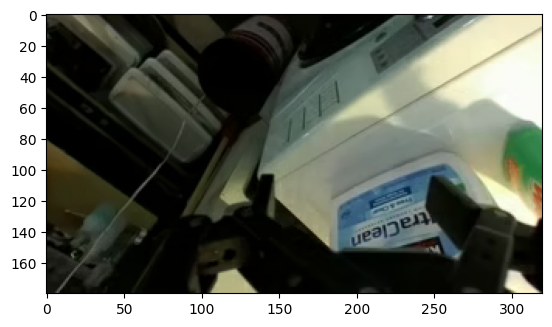

In [6]:
video_key = "observation.images.wrist_left"
chunk_index = 0
file_index = 0
video_path = f"data/droid_small/videos/{video_key}/chunk-{chunk_index:03d}/file-{file_index:03d}.mp4"

frame_idx = 0

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise IOError(f"Cannot open video file {video_path}")

print("Number of frames: ", int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

duration = frame_count / fps if fps > 0 else 0

print(f"Frames per second (FPS): {fps}")
print(f"Total frames: {frame_count}")
print(f"Resolution: {width} x {height}")
print(f"Duration (seconds): {duration:.2f}")

# Set the frame position
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)

# Read the frame
ret, frame = cap.read()

if not ret:
    raise ValueError(f"Cannot read frame at index {frame_idx}")

# Convert BGR (OpenCV default) to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()

plt.imshow(frame_rgb)
plt.show()